# BIBLIOTECAS

In [24]:
import pandas as pd
import yaml
import numpy as np

from IPython.core.display import HTML
from IPython.display import Image

from  matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = 12,8

pd.set_option('display.max_columns', 30)

# Funçoes Auxiliares

In [5]:
def import_config(path_yaml):
    with open(path_yaml) as config_file:
        config = yaml.safe_load(config_file)
    return config

# 1.0 IMPORT DATA AND CONFIG

### 1.1 CONFIG

In [6]:
config = import_config('config.yaml')

In [7]:
config['data']['raw_path']

'../data/raw/raw_data.csv'

## 1.2 DATA

In [8]:
df1 = pd.read_csv(config['data']['raw_path'])

In [42]:
df1.head()

,escolaridade,renda_mensal_informal,dependentes,estado_civil,idade,conta_poupanca,conta_salario,qtd_fonte_renda,cheque_sem_fundo,conta_conjunta,...,valor_conta_poupanca,valor_emprestimo,multa,juros,valor_emprestimo_atualizado,pago,id,genero,data,estado
0,NaN,NaN,S,solteiro,36,S,N,NaN,S,N,...,NaN,8174.32,263.25,5844.98,14282.55,sim,309652396,feminino,2020-01-01,minas gerais
1,nivel medio,1894.5078,N,solteiro,39,S,N,1.0,N,N,...,NaN,41775.63,1607.29,7652.26,51035.18,sim,498764591,feminino,2020-01-01,espirito santo
2,nivel medio,NaN,S,solteiro,26,S,N,1.0,N,N,...,NaN,522940.27,24860.40,319315.62,867116.29,sim,504868288,masculino,2020-01-01,sao paulo
3,NaN,NaN,N,casado(a) com comunhao de bens,23,N,N,NaN,S,N,...,NaN,1418.00,21472.36,2967.48,25857.84,sim,541365315,feminino,2020-01-01,sao paulo
4,NaN,NaN,S,solteiro,33,S,N,NaN,S,N,...,NaN,2078.97,19.44,46.35,2144.76,sim,563622907,masculino,2020-01-01,espirito santo


# 2.0 DATA CLEAN

In [9]:
df2 = df1.copy()

## 2.1 DESCRIÇÃO DOS DADOS

In [44]:
df2.head()

,escolaridade,renda_mensal_informal,dependentes,estado_civil,idade,conta_poupanca,conta_salario,qtd_fonte_renda,cheque_sem_fundo,conta_conjunta,valor_conta_corrente,valor_conta_poupanca,valor_emprestimo,multa,juros,valor_emprestimo_atualizado,pago,id,genero,data,estado
0,NaN,NaN,S,solteiro,36,S,N,NaN,S,N,NaN,NaN,8174.32,263.25,5844.98,14282.55,sim,309652396,feminino,2020-01-01,minas gerais
1,nivel medio,1894.5078,N,solteiro,39,S,N,1.0,N,N,NaN,NaN,41775.63,1607.29,7652.26,51035.18,sim,498764591,feminino,2020-01-01,espirito santo
2,nivel medio,NaN,S,solteiro,26,S,N,1.0,N,N,NaN,NaN,522940.27,24860.40,319315.62,867116.29,sim,504868288,masculino,2020-01-01,sao paulo
3,NaN,NaN,N,casado(a) com comunhao de bens,23,N,N,NaN,S,N,NaN,NaN,1418.00,21472.36,2967.48,25857.84,sim,541365315,feminino,2020-01-01,sao paulo
4,NaN,NaN,S,solteiro,33,S,N,NaN,S,N,NaN,NaN,2078.97,19.44,46.35,2144.76,sim,563622907,masculino,2020-01-01,espirito santo


## 2.2 DIMENSÃO DOS DADOS

In [45]:
df2.shape

(50390, 21)

## 2.3 TIPO DA COLUNA

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   escolaridade                 14615 non-null  object 
 1   renda_mensal_informal        9768 non-null   float64
 2   dependentes                  50390 non-null  object 
 3   estado_civil                 50390 non-null  object 
 4   idade                        50390 non-null  int64  
 5   conta_poupanca               50390 non-null  object 
 6   conta_salario                50390 non-null  object 
 7   qtd_fonte_renda              12806 non-null  float64
 8   cheque_sem_fundo             50390 non-null  object 
 9   conta_conjunta               50390 non-null  object 
 10  valor_conta_corrente         0 non-null      float64
 11  valor_conta_poupanca         0 non-null      float64
 12  valor_emprestimo             50390 non-null  float64
 13  multa           

## 2.4 CHECAR NAN VALUES

In [47]:
df2.isna().sum() / len(df2)

escolaridade                   0.709962
renda_mensal_informal          0.806152
dependentes                    0.000000
estado_civil                   0.000000
idade                          0.000000
conta_poupanca                 0.000000
conta_salario                  0.000000
qtd_fonte_renda                0.745862
cheque_sem_fundo               0.000000
conta_conjunta                 0.000000
valor_conta_corrente           1.000000
valor_conta_poupanca           1.000000
valor_emprestimo               0.000000
multa                          0.000000
juros                          0.000000
valor_emprestimo_atualizado    0.000000
pago                           0.000000
id                             0.000000
genero                         0.000000
data                           0.000000
estado                         0.000000
dtype: float64

## 2.5 DROPAR LINHAS DUPLICADAS

In [48]:
df2.drop_duplicates().shape

(50390, 21)

## 2.6 MUDAR TIPO DA VARIAVAL

In [49]:
df2['data'] = df2['data'].astype('datetime64[ns]')

## 2.7 DROP COLUNAS

In [50]:
# 100% vazio não tem como avaliar o dado
df2 = df2.drop(['valor_conta_corrente', 'valor_conta_poupanca'], axis='columns')

df2 = df2.drop(['escolaridade', 'renda_mensal_informal', 'qtd_fonte_renda'], axis='columns')

df2 = df2.drop(['data'], axis='columns')


## 2.8 ESTATISTICA DESCRITIVA

In [14]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])

cat_attributes = df2.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'])


### 2.8 .1 VARIAVES NUMERICAS

In [16]:
# Tendencia central - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply(np.std)).T
d2 = pd.DataFrame( num_attributes.apply(np.min)).T
d3 = pd.DataFrame( num_attributes.apply(np.max)).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,idade,1.800000e+01,1.130000e+02,9.500000e+01,3.172453e+01,3.000000e+01,8.565032e+00,1.959951,7.223175
1,valor_emprestimo,1.393000e+03,2.867894e+08,2.867880e+08,5.198887e+04,2.298035e+03,1.588803e+06,135.859233,22605.724510
2,multa,0.000000e+00,5.737759e+08,5.737759e+08,6.022658e+04,6.489650e+02,2.843913e+06,171.305766,33333.600930
3,juros,0.000000e+00,5.703619e+08,5.703619e+08,6.485391e+04,1.143320e+03,2.728143e+06,184.431138,38002.805365
4,valor_emprestimo_atualizado,1.397040e+03,1.430927e+09,1.430926e+09,1.770694e+05,5.652695e+03,7.058294e+06,171.822788,33820.743108
5,id,1.000172e+08,9.999988e+08,8.999816e+08,5.485969e+08,5.482058e+08,2.601475e+08,0.007412,-1.203943


In [19]:
num_attributes.describe(percentiles=[0.99, 0.95,0.75,0.5]).T

,count,mean,std,min,50%,75%,95%,99%,max
idade,50390.0,3.172453e+01,8.565117e+00,1.800000e+01,3.000000e+01,3.500000e+01,4.800000e+01,6.200000e+01,1.130000e+02
valor_emprestimo,50390.0,5.198887e+04,1.588819e+06,1.393000e+03,2.298035e+03,7.172175e+03,5.879202e+04,4.464769e+05,2.867894e+08
multa,50390.0,6.022658e+04,2.843941e+06,0.000000e+00,6.489650e+02,3.600000e+03,6.189092e+04,5.039267e+05,5.737759e+08
juros,50390.0,6.485391e+04,2.728170e+06,0.000000e+00,1.143320e+03,5.545427e+03,8.235361e+04,6.408426e+05,5.703619e+08
valor_emprestimo_atualizado,50390.0,1.770694e+05,7.058364e+06,1.397040e+03,5.652695e+03,1.903061e+04,2.006742e+05,1.586720e+06,1.430927e+09
id,50390.0,5.485969e+08,2.601500e+08,1.000172e+08,5.482058e+08,7.737146e+08,9.542667e+08,9.912031e+08,9.999988e+08


### 2.8.2 VARIAVEIS CATEGORICAS

In [21]:
for i in cat_attributes.columns:
    print(cat_attributes[i].value_counts(normalize=True))
    print('==========================\n\n')

dependentes
N    0.639968
S    0.360032
Name: proportion, dtype: float64


estado_civil
solteiro                                  0.547053
casado(a) com comunhao parcial de bens    0.263604
casado(a) com comunhao de bens            0.154098
casado(a) com separacao de bens           0.030959
separado judicialmente                    0.001469
divorciado                                0.001330
viuvo(a)                                  0.000814
outros                                    0.000675
Name: proportion, dtype: float64


conta_poupanca
S    0.847986
N    0.152014
Name: proportion, dtype: float64


conta_salario
N    0.976603
S    0.023397
Name: proportion, dtype: float64


cheque_sem_fundo
S    0.769974
N    0.230026
Name: proportion, dtype: float64


conta_conjunta
N    0.958285
S    0.041715
Name: proportion, dtype: float64


pago
sim    0.790891
nao    0.209109
Name: proportion, dtype: float64


genero
masculino    0.501667
feminino     0.498333
Name: proportion, dtype: float64


# 3.0 MIND MAP E ENGENHARIA DE VARIAVEIS

In [10]:
df3 =df2.copy()

## 3.1 MIND MAP

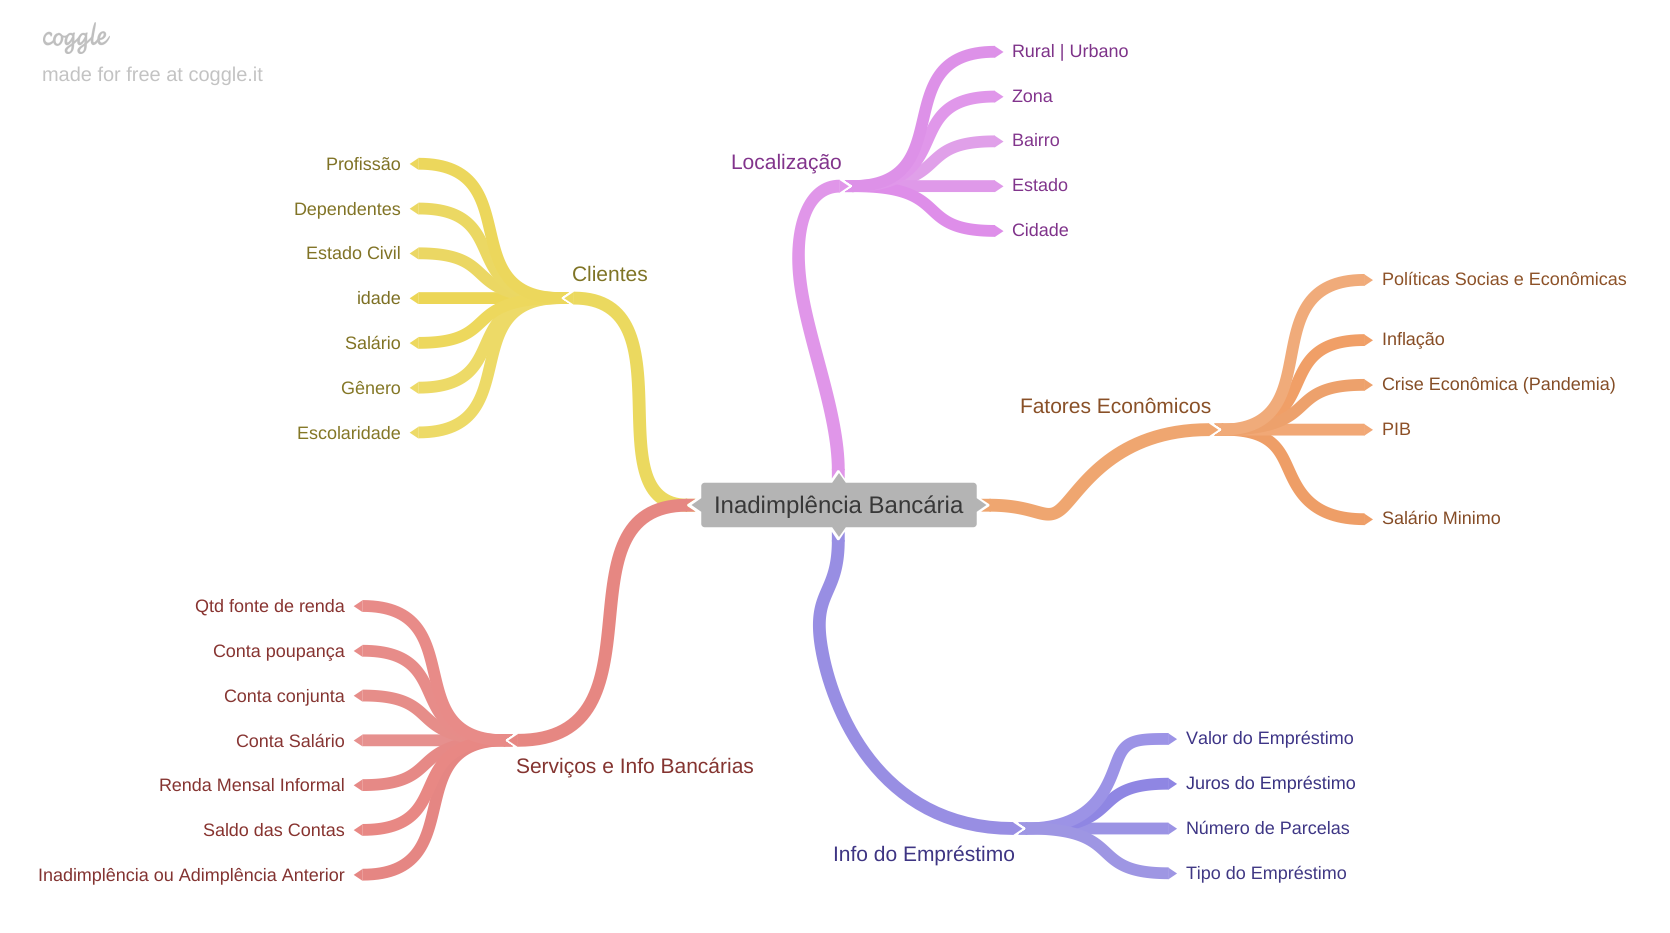

In [31]:
Image(config['imagem']['path'])

### Hipóteses de Informações dos Clientes

1. Mulheres são em média 10% mais ADIMPLENTES.
2. Clientes com Menos de 60 anos são em média 20% mais ADIMPLENTES.
3. Clientes com Dependentes são em média 15% mais ADIMPLENTES.
4. Clientes que são solteiros tem uma taxa percentual maior de INADIMPLÊNCIA que os demais.

### Hipóteses de Informações Bancárias

5. Clientes com conta salário são em média 30% mais ADIMPLENTES.
6. Clientes com conta poupança são em média 10% mais ADIMPLENTES.
7. Clientes que já passaram cheque sem fundo são em média 15% mais INADIMPLENTES.
8. Clientes que tem conta conjunta são em média 10% mais INADIMPLENTES.

### Hipóteses de Informações do Empréstimo

9. Clientes que pegaram empréstimos de mais de RS$20000 tem tendência a ser INADIMPLENTES.

### Hipóteses de Informações de Localização

10. Clientes que moram no Estado RJ E SP tem maior percentual de ADIMPLENTE
do que ES e MG.

## 3.2 Engenharia de variaveis

In [11]:
len(df3['id'].unique())

50390

In [13]:
df3.shape

(50390, 21)

In [15]:
df3['juros_porcentagem'] = df3['juros'] / df3['valor_emprestimo']

# 4.0 EDA UNIVARIADA

In [17]:
df4 = df3.copy()

## 4.1 NUMERICA

In [18]:
num_attributes = df4.select_dtypes(include=['int64', 'float64'])

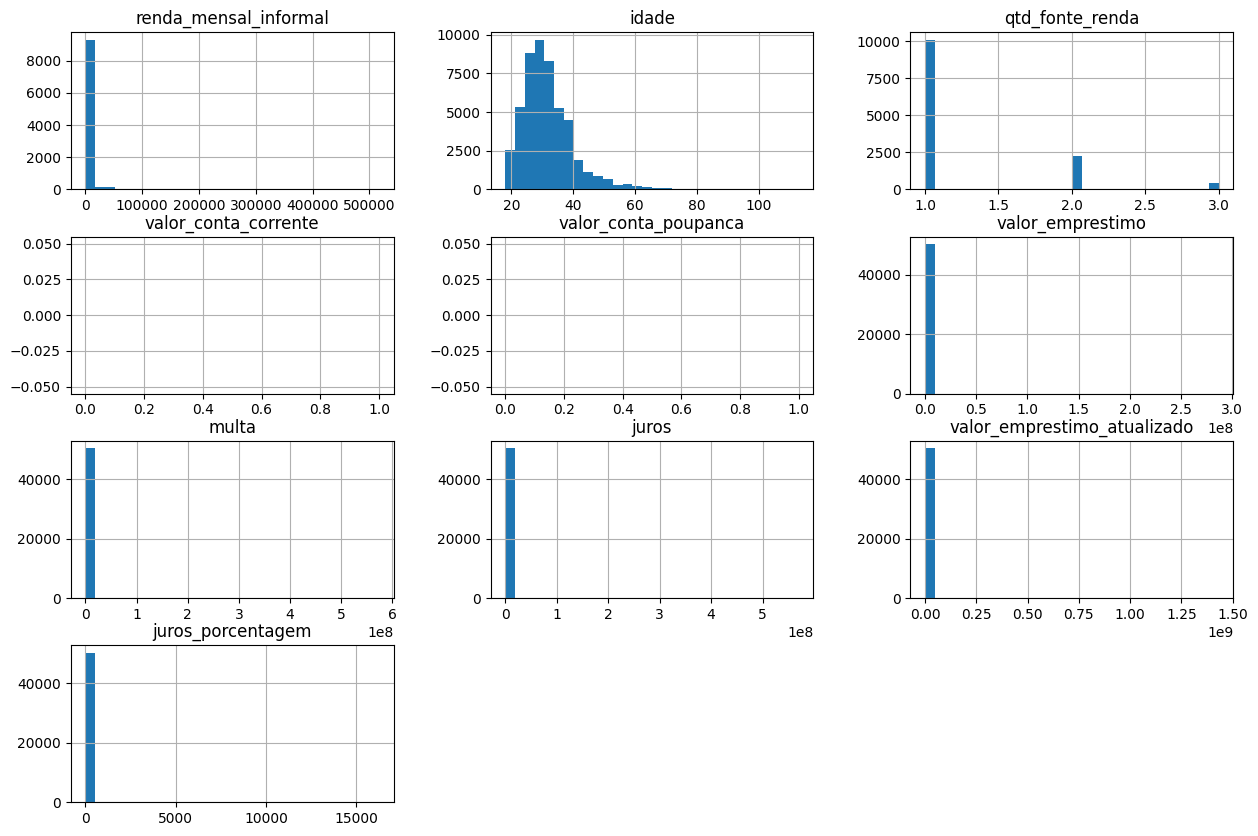

In [20]:
num_attributes.drop('id', axis='columns').hist(bins=30, figsize=(15,10));

### 4.1.1 IDADE

count    50390.000000
mean        31.724529
std          8.565117
min         18.000000
25%         26.000000
50%         30.000000
75%         35.000000
max        113.000000
Name: idade, dtype: float64


Text(0.5, 1.0, 'boxplot')

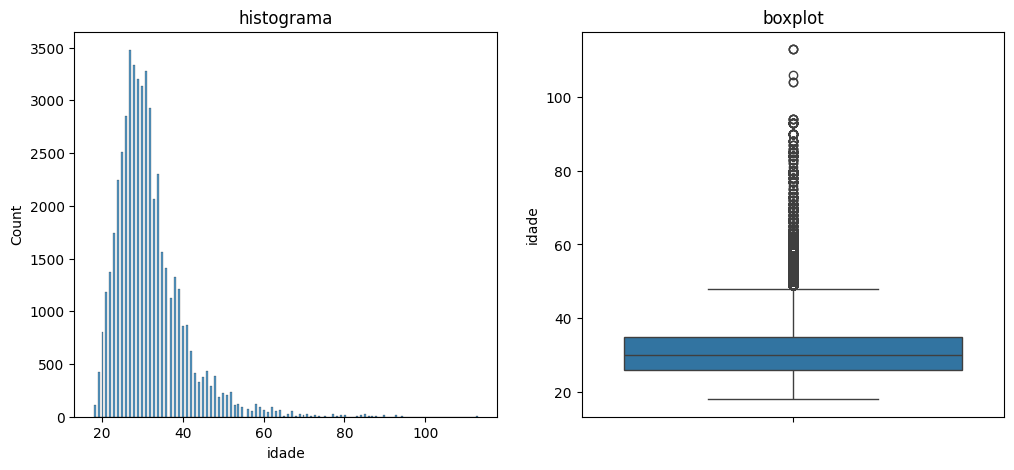

In [25]:
print(df4['idade'].describe())
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df4['idade'], ax=axes[0])
axes[0].set_title('histograma')

sns.boxplot(df4['idade'], ax=axes[1])
axes[1].set_title('boxplot')

### 4.1.2 VALOR DO EMPRESTIMO

count    5.039000e+04
mean     5.198887e+04
std      1.588819e+06
min      1.393000e+03
25%      1.622370e+03
50%      2.298035e+03
75%      7.172175e+03
max      2.867894e+08
Name: valor_emprestimo, dtype: float64


Text(0.5, 1.0, 'boxplot')

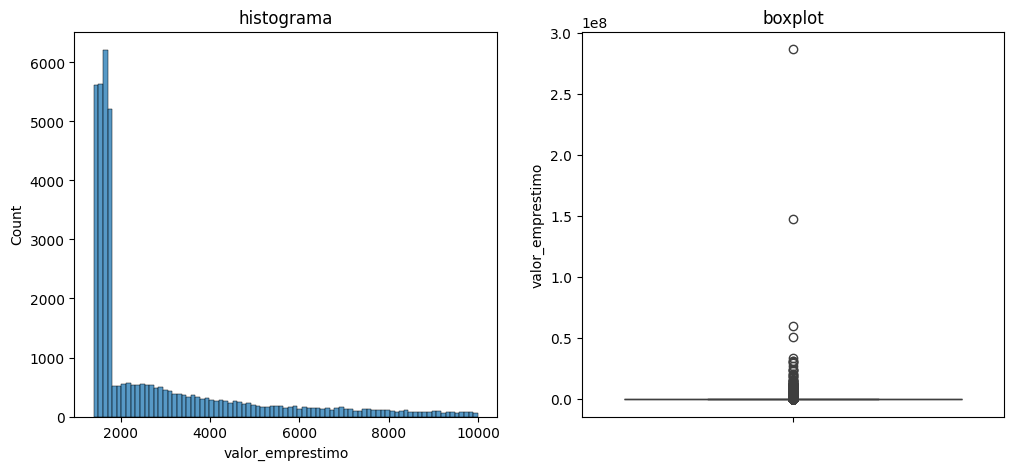

In [26]:
print(df4['valor_emprestimo'].describe())
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df4[df4['valor_emprestimo'] < 10000]['valor_emprestimo'], ax=axes[0])
axes[0].set_title('histograma')

sns.boxplot(df4['valor_emprestimo'], ax=axes[1])
axes[1].set_title('boxplot')

### 4.1.3 MULTA

count    5.039000e+04
mean     6.022658e+04
std      2.843941e+06
min      0.000000e+00
25%      1.325675e+02
50%      6.489650e+02
75%      3.600000e+03
max      5.737759e+08
Name: multa, dtype: float64


Text(0.5, 1.0, 'boxplot')

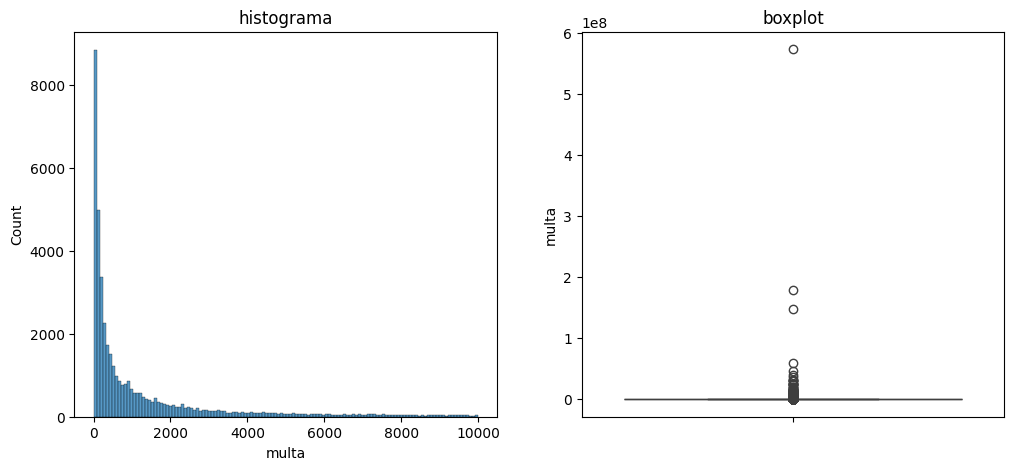

In [27]:
print(df4['multa'].describe())
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df4[df4['multa'] < 10000]['multa'], ax=axes[0])
axes[0].set_title('histograma')

sns.boxplot(df4['multa'], ax=axes[1])
axes[1].set_title('boxplot')

### 4.1.4 JUROS

count    5.039000e+04
mean     6.485391e+04
std      2.728170e+06
min      0.000000e+00
25%      2.742725e+02
50%      1.143320e+03
75%      5.545427e+03
max      5.703619e+08
Name: juros, dtype: float64


Text(0.5, 1.0, 'boxplot')

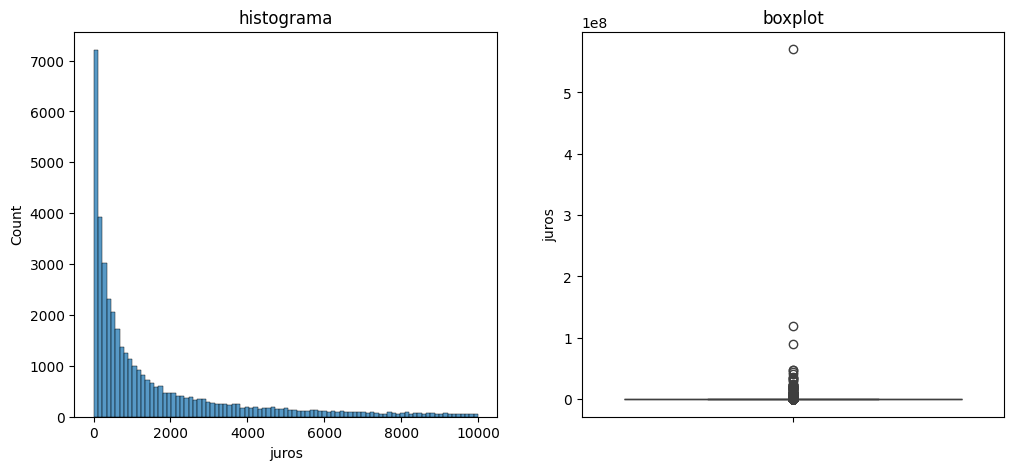

In [ ]:
print(df4['juros'].describe())
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df4[df4['juros'] < 10000]['juros'], ax=axes[0])
axes[0].set_title('histograma')

sns.boxplot(df4['juros'], ax=axes[1])
axes[1].set_title('boxplot')

### 4.1.5 VOLOR DO EMPRESTIMO ATUALIZADO

count    5.039000e+04
mean     1.770694e+05
std      7.058364e+06
min      1.397040e+03
25%      2.842910e+03
50%      5.652695e+03
75%      1.903061e+04
max      1.430927e+09
Name: valor_emprestimo_atualizado, dtype: float64


Text(0.5, 1.0, 'boxplot')

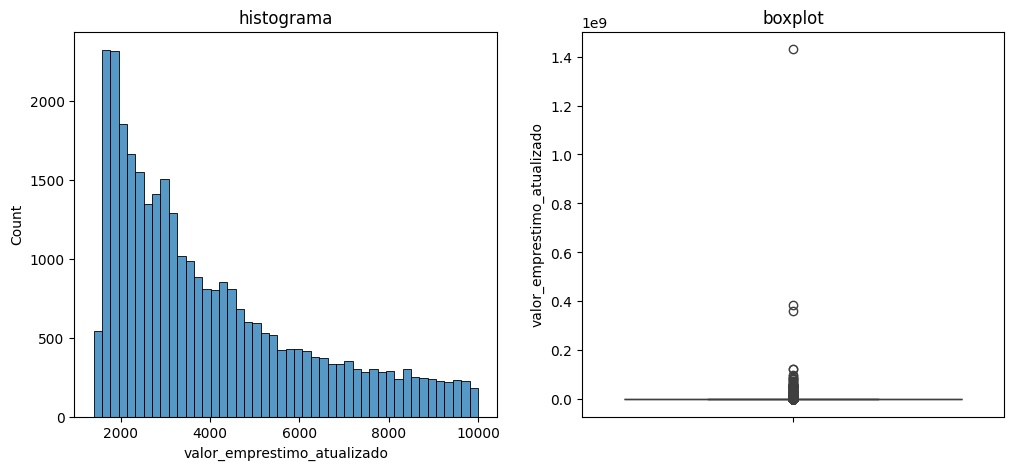

In [29]:
print(df4['valor_emprestimo_atualizado'].describe())
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df4[df4['valor_emprestimo_atualizado'] < 10000]['valor_emprestimo_atualizado'], ax=axes[0])
axes[0].set_title('histograma')

sns.boxplot(df4['valor_emprestimo_atualizado'], ax=axes[1])
axes[1].set_title('boxplot')

### 4.1.6 JUROS PORCENTAGEM

count    50390.000000
mean         3.029730
std        105.423189
min          0.000000
25%          0.112590
50%          0.349677
75%          0.848668
max      16248.020882
Name: juros_porcentagem, dtype: float64


Text(0.5, 1.0, 'boxplot')

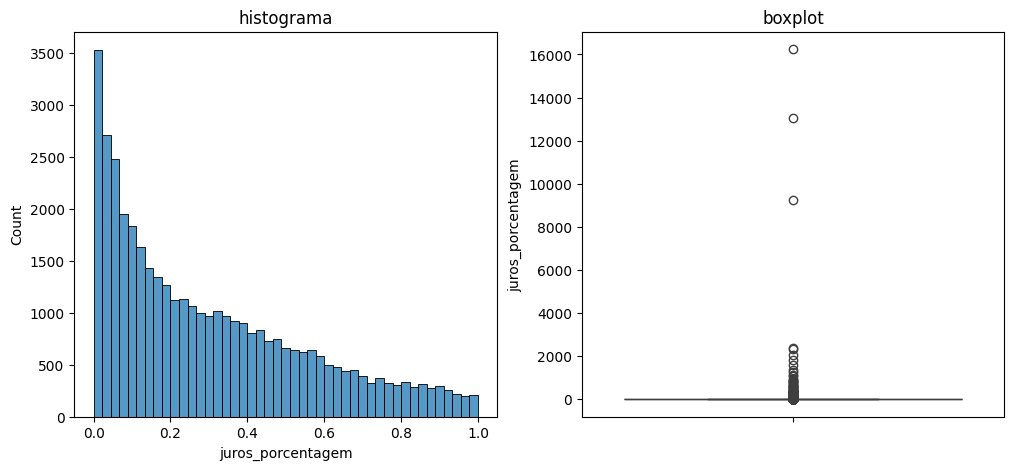

In [30]:
print(df4['juros_porcentagem'].describe())
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df4[df4['juros_porcentagem'] < 1]['juros_porcentagem'], ax=axes[0])
axes[0].set_title('histograma')

sns.boxplot(df4['juros_porcentagem'], ax=axes[1])
axes[1].set_title('boxplot')

## 4.2 CATEGORICAS

### 4.2.1 DEPENDENTES

dependentes
N    0.639968
S    0.360032
Name: proportion, dtype: float64


<Axes: xlabel='dependentes', ylabel='count'>

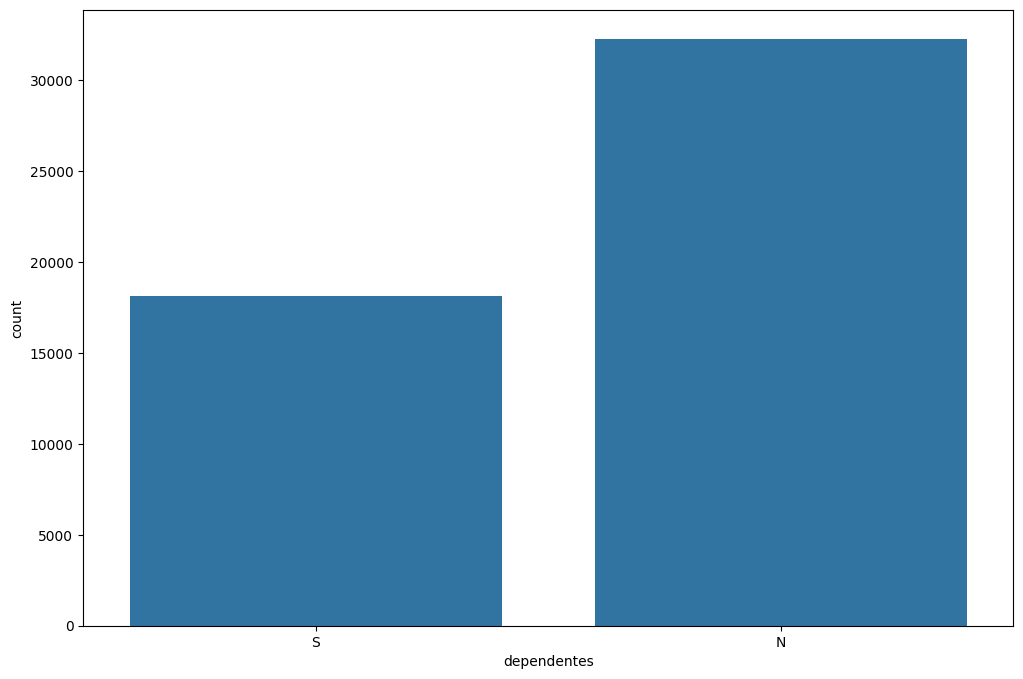

In [32]:
print(df4['dependentes'].value_counts(normalize=True))
sns.countplot(x='dependentes', data=df4)

### 4.2.2 ESTADO CIVIL

estado_civil
solteiro                                  0.547053
casado(a) com comunhao parcial de bens    0.263604
casado(a) com comunhao de bens            0.154098
casado(a) com separacao de bens           0.030959
separado judicialmente                    0.001469
divorciado                                0.001330
viuvo(a)                                  0.000814
outros                                    0.000675
Name: proportion, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'solteiro'),
  Text(1, 0, 'casado(a) com comunhao de bens'),
  Text(2, 0, 'casado(a) com comunhao parcial de bens'),
  Text(3, 0, 'casado(a) com separacao de bens'),
  Text(4, 0, 'divorciado'),
  Text(5, 0, 'separado judicialmente'),
  Text(6, 0, 'viuvo(a)'),
  Text(7, 0, 'outros')])

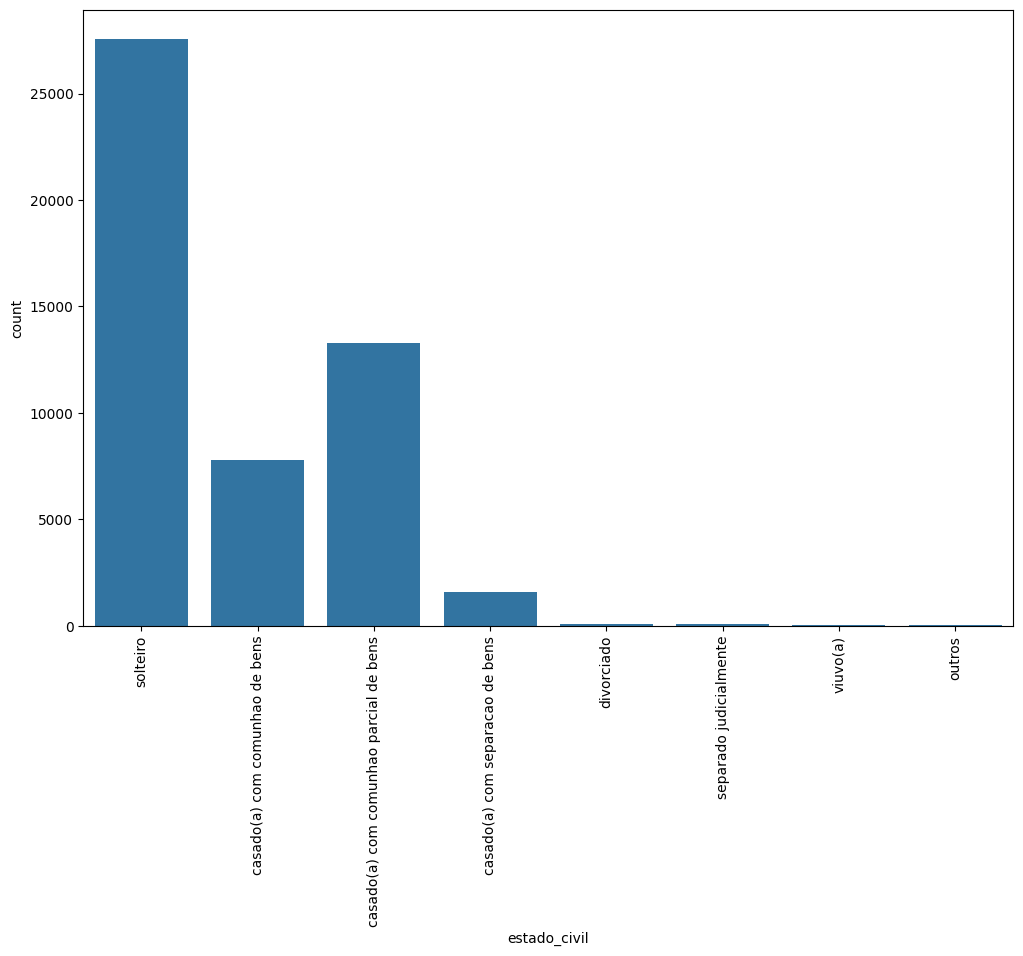

In [34]:
print(df4['estado_civil'].value_counts(normalize=True))
sns.countplot(x='estado_civil', data=df4)
plt.xticks(rotation= 90)

### 4.2.3 CONTA POUPANCA

conta_poupanca
S    0.847986
N    0.152014
Name: proportion, dtype: float64


<Axes: xlabel='conta_poupanca', ylabel='count'>

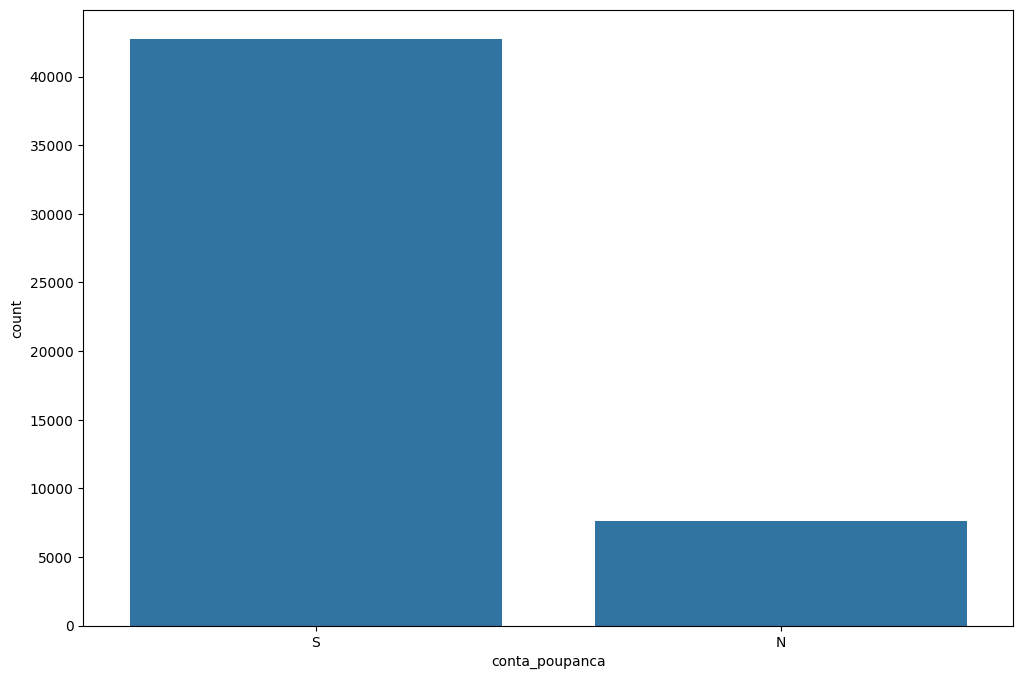

In [35]:
print(df4['conta_poupanca'].value_counts(normalize=True))
sns.countplot(x='conta_poupanca', data=df4)

### 4.2.4 CONTA SALARIO

conta_salario
N    0.976603
S    0.023397
Name: proportion, dtype: float64


<Axes: xlabel='conta_salario', ylabel='count'>

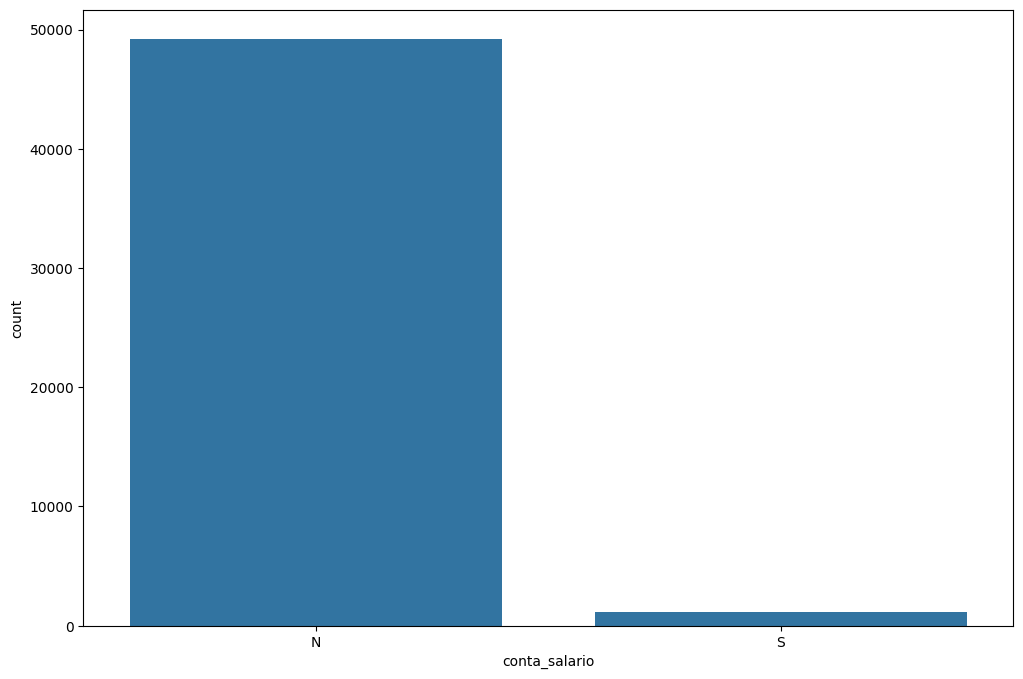

In [36]:
print(df4['conta_salario'].value_counts(normalize=True))
sns.countplot(x='conta_salario', data=df4)

### 4.2.5 CHEQUE SEM FUNDO

cheque_sem_fundo
S    0.769974
N    0.230026
Name: proportion, dtype: float64


<Axes: xlabel='cheque_sem_fundo', ylabel='count'>

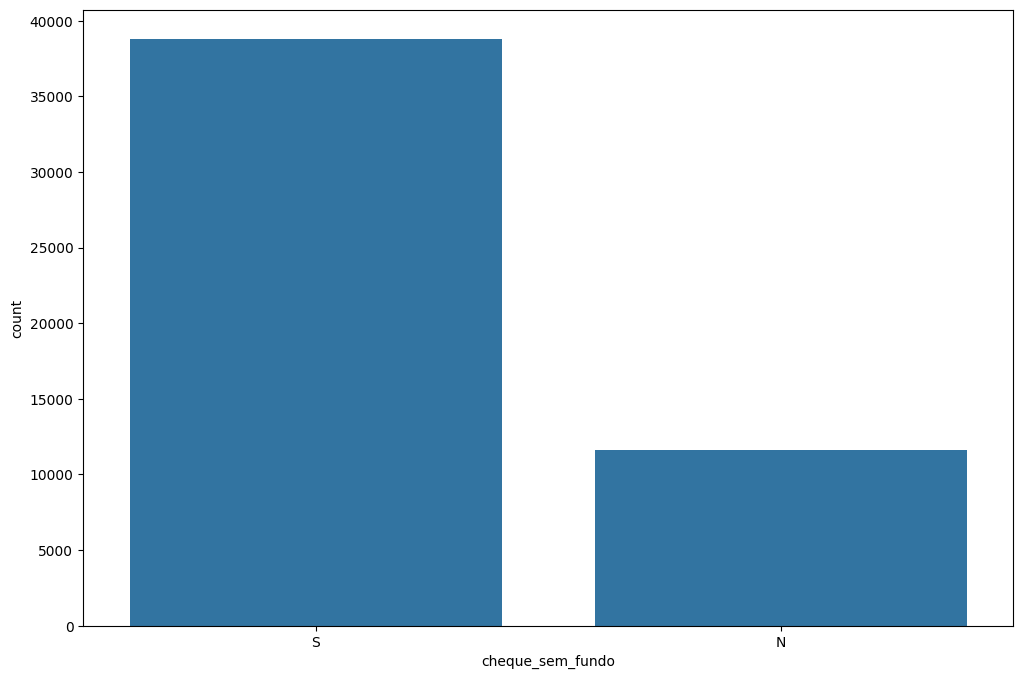

In [38]:
print(df4['cheque_sem_fundo'].value_counts(normalize=True))
sns.countplot(x='cheque_sem_fundo', data=df4)

### 4.2.6 CONTA CONJUNTA

conta_conjunta
N    0.958285
S    0.041715
Name: proportion, dtype: float64


<Axes: xlabel='conta_conjunta', ylabel='count'>

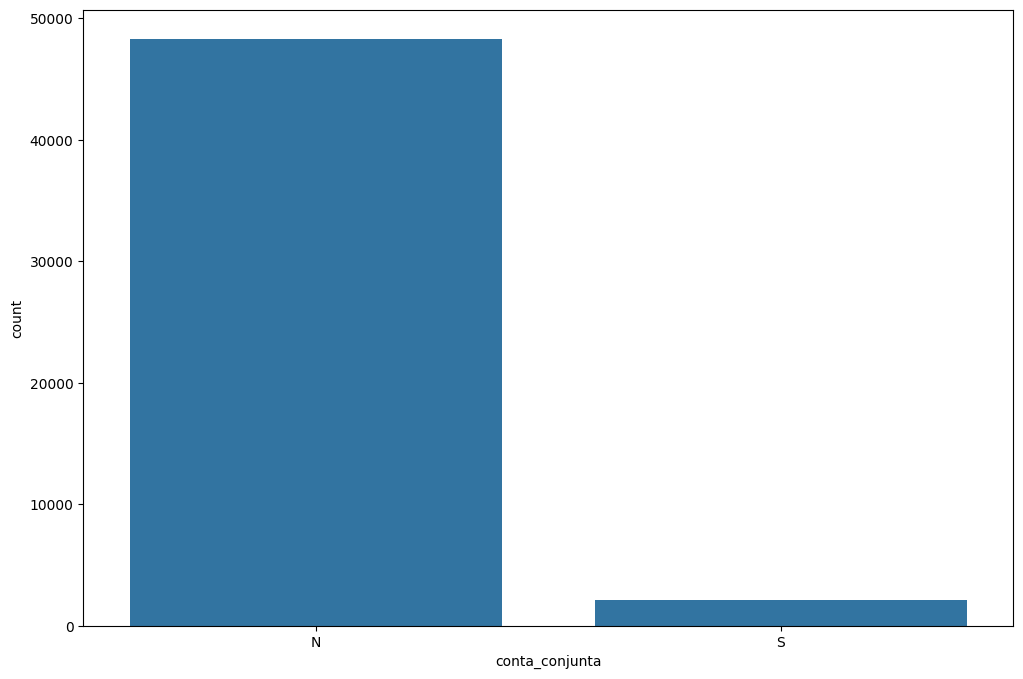

In [39]:
print(df4['conta_conjunta'].value_counts(normalize=True))
sns.countplot(x='conta_conjunta', data=df4)

### 4.2.7 PAGO

pago
sim    0.790891
nao    0.209109
Name: proportion, dtype: float64


<Axes: xlabel='pago', ylabel='count'>

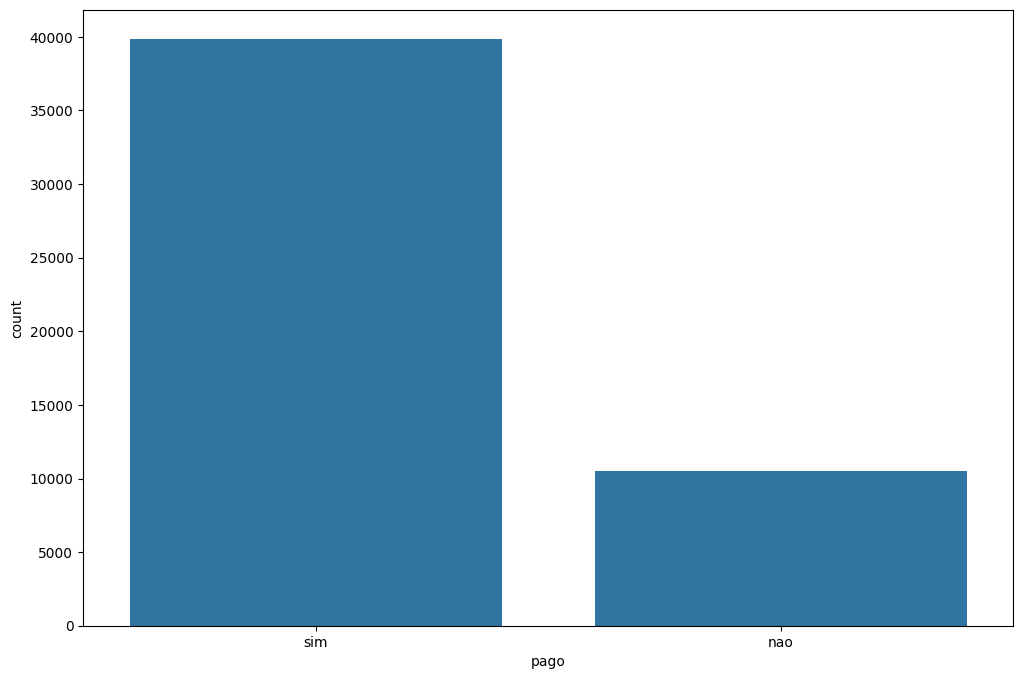

In [40]:
print(df4['pago'].value_counts(normalize=True))
sns.countplot(x='pago', data=df4)

### 4.2.8 GENERO

genero
masculino    0.501667
feminino     0.498333
Name: proportion, dtype: float64


<Axes: xlabel='genero', ylabel='count'>

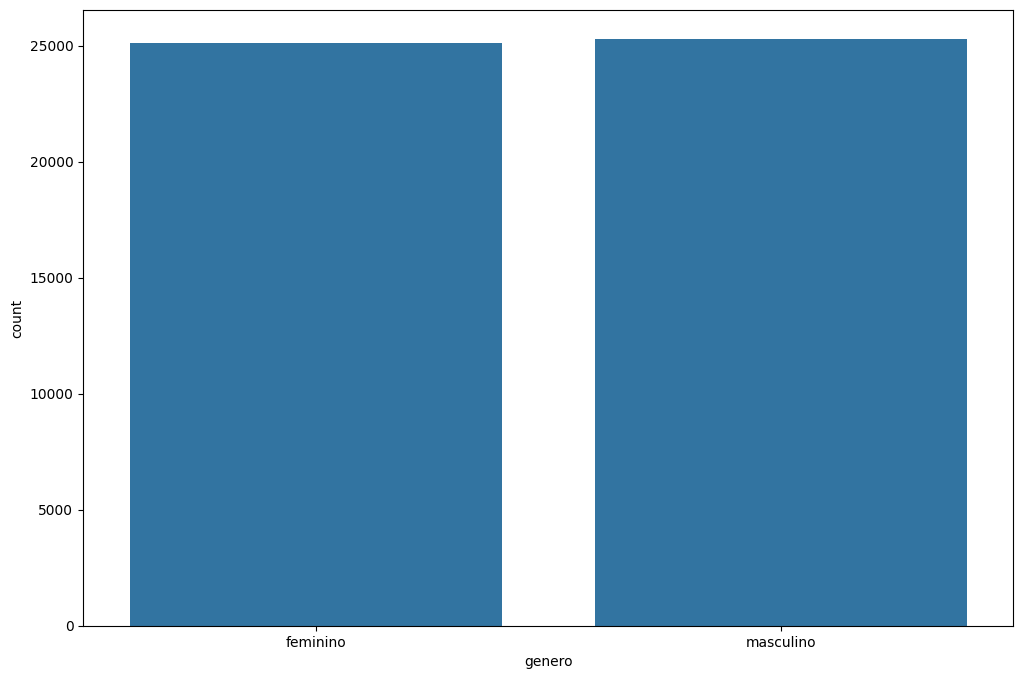

In [41]:
print(df4['genero'].value_counts(normalize=True))
sns.countplot(x='genero', data=df4)

### 4.2.9 ESTADO

estado
minas gerais      0.251340
sao paulo         0.250189
espirito santo    0.249772
rio de janeiro    0.248700
Name: proportion, dtype: float64


<Axes: xlabel='estado', ylabel='count'>

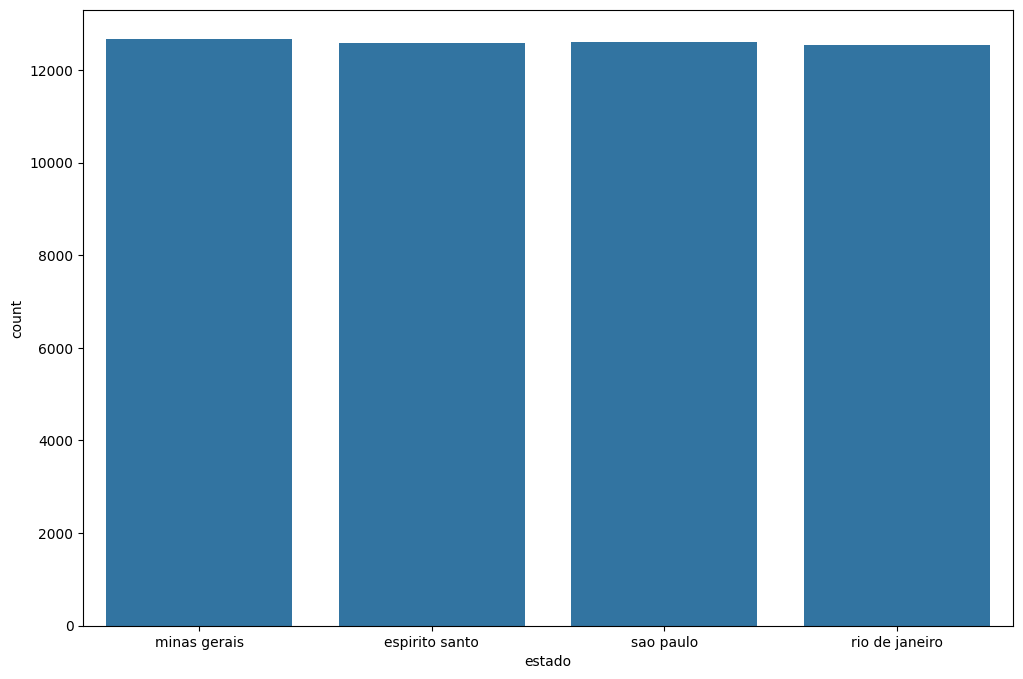

In [42]:
print(df4['estado'].value_counts(normalize=True))
sns.countplot(x='estado', data=df4)